In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# def f(x, y):
#     return np.sin(x + y) 

def f(x,y):
    return np.sin(x*2*np.pi*y) + np.cos(np.pi*4*y)

def erreur(y_true, y_pred):
    return np.sqrt((y_true - y_pred)**2)

In [4]:
N_train = 20 
N_test = 200



x_train = np.linspace(0, 1, N_train)
y_train = np.linspace(0, 1, N_train)
x_train, y_train  = np.meshgrid(x_train, y_train)
z_train = f(x_train, y_train)
XY_train = np.column_stack((x_train.ravel(), y_train.ravel())) 

x_test = np.linspace(0, 1, N_test)
y_test = np.linspace(0, 1, N_test)
x_test, y_test  = np.meshgrid(x_test, y_test)
XY_test = np.column_stack((x_test.ravel(), y_test.ravel())) 
z_test = f(x_test, y_test)

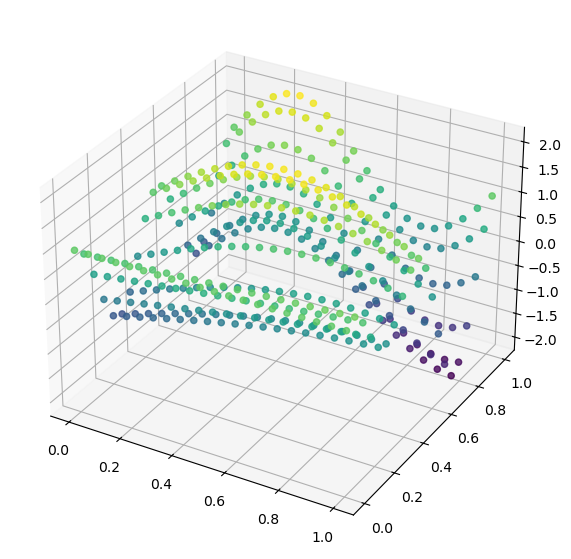

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train, y_train,z_train,c = z_train ,cmap='viridis', alpha=0.8)
plt.show()

In [6]:
input = Input(shape=(2,))
x = Dense(128, activation='relu')(input) # pour la fonction sin mettre tanh sur toute les couches
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x_output = Dense(1)(x)
model = Model(inputs=input, outputs=x_output)

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(XY_train, z_train.flatten(), epochs=100, batch_size=64)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8306  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7708 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7461 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7234 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7046 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6915 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6769 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6675 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6623 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6470 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6431 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6281 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6279 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6215 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6065 
Epoch 16/100
7/7 ━

In [8]:
y_pred = model.predict(XY_test).reshape(N_test, N_test)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


In [9]:
# calcul erreur :
res = erreur(y_pred, z_test)
print(np.sum(res))

2742.9547607301843


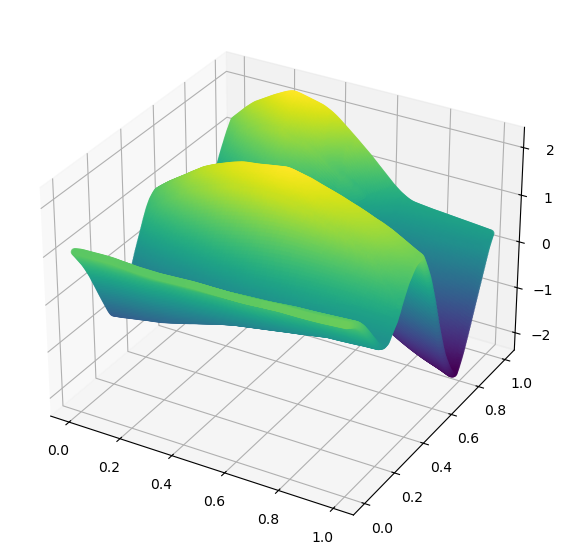

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test, y_test,y_pred,c = y_pred ,cmap='viridis', alpha=0.8)
plt.show()

In [11]:
# mse
np.sum(res**2)/ (N_test*N_test)

np.float64(0.010193244499954639)

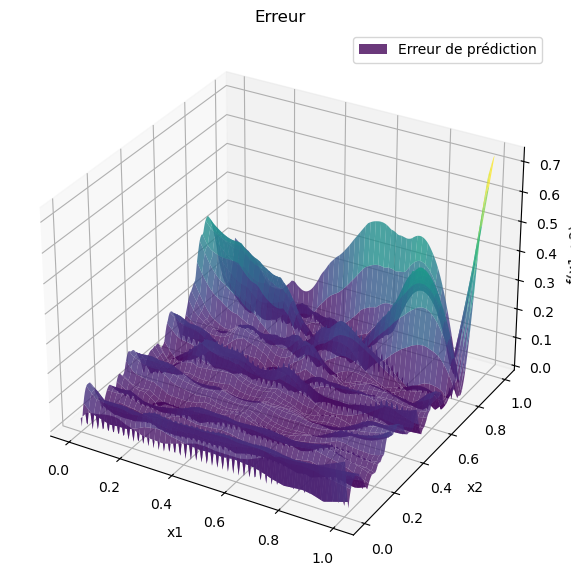

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_test, y_test, res, cmap='viridis', alpha=0.8,label='Erreur de prédiction')

ax.set_title("Erreur")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()